In [1]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [3]:
# RA e DEC - catalogo Wen
w['RAJ2000'], w['DEJ2000']

(<MaskedColumn name='RAJ2000' dtype='float64' length=132684>
   0.00236
   0.00957
   0.01377
   0.01475
   0.01945
   0.02024
   0.02303
   0.02482
   0.02643
   0.02755
   0.02762
   0.02765
       ...
 359.96988
 359.97192
 359.97241
  359.9729
 359.97311
 359.97504
 359.97543
 359.98712
 359.99329
   359.995
 359.99677
  359.9986, <MaskedColumn name='DEJ2000' dtype='float64' length=132684>
  32.20925
   5.28827
  31.23175
  31.78564
   2.47386
  -3.54679
  35.76957
   15.4299
  22.20558
  10.11333
  31.87626
  29.35813
       ...
   0.69856
  -9.76429
  13.70903
   -7.9587
   3.45559
  30.13158
 -11.13708
  22.67506
  13.29671
   0.70175
  21.78513
  -3.43781)

In [4]:
# RA e DEC catalogo Redmapper
r['RA'], r['DEC']

(array([ 239.58332907,  250.08254839,  197.87295717, ...,  180.83079888,
         153.82422578,  135.96337099]),
 array([ 27.23341292,  46.71153135,  -1.34111628, ...,  52.37043161,
         43.63535754,  15.20173173]))

In [5]:
NSIDE = 128

In [6]:
# Area de cada pixel
hp.nside2pixarea(NSIDE, degrees = True)

0.2098234113027917

In [7]:
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [8]:
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [9]:
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)

In [10]:
n = np.arange(hp.nside2npix(NSIDE))

In [11]:
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)

In [12]:
m = np.arange(hp.nside2npix(NSIDE))

In [13]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))

196608
196608


In [14]:
print rpix, wpix

[ 53332  27002 100377 ...,  20402  30222  72641] DEJ2000
-------
  45312
  89344
  47360
  46336
  93440
 103680
  40192
  71936
  60672
  81152
    ...
 114944
  75008
 111872
  92416
  48384
 116992
  60671
  75008
  96512
  61696
 103680
Length = 132684 rows


In [15]:
print len(wpix)
print len(rpix)

132684
26111


Codigo do Match:
Primeira parte designa-se uma lista onde sera salvo os valores do match. E dois intervalos, um com o valor do rykoff e outro do wen.
Depois com uso do if, se compara o numero do pixel de um catalogo com o de outro, para assim obtermos o match.

In [16]:
lista = []
rp = range(0,26111)
wp = range(0,132684)
for wp in wpix: 
    for rp in rpix:
        if wp==rp:
            lista.append(wp)

In [17]:
print len(lista) 

90390


In [18]:
# Retira os numeros de pixels repetidos
lista = list(set(lista))

In [19]:
print len(lista)

18958


In [20]:
# Aglomerados do wen que estao no match
lista_w = []
for i in range(len(wpix)):
    if wpix[i] in lista:
        lista_w.append(i)      

In [21]:
print len(lista_w)

60425


In [22]:
# Aglomerados do rykoff que estao no match
lista_r = []
for i in range(len(rpix)):
    if rpix[i] in lista:
        lista_r.append(i) 

In [23]:
print len(lista_r)

25791


In [24]:
match = hp.pix2ang(NSIDE, lista)

In [25]:
print match
print match[0]

(array([ 0.84106867,  1.57079633,  1.57079633, ...,  1.57079633,
        1.23095942,  1.23095942]), array([ 3.14772858,  3.14772858,  3.17227227, ...,  3.11091304,
        3.12318488,  3.13545673]))
[ 0.84106867  1.57079633  1.57079633 ...,  1.57079633  1.23095942
  1.23095942]


In [26]:
match = match[0]

In [27]:
w_pix = hp.pix2ang(NSIDE,wpix)
r_pix = hp.pix2ang(NSIDE,rpix)

In [28]:
w_pix = w_pix[0]
r_pix = r_pix[0]

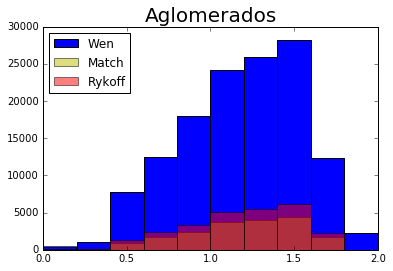

In [29]:
x = w_pix
y = match
z = r_pix
plt.hist(x, label = 'Wen', range = [0, 2.0])
plt.hist(y, label = 'Match', alpha = 0.5, range = [0, 2.0], color = 'y')
plt.hist(z, label = 'Rykoff', alpha = 0.5, range = [0, 2.0], color = 'r')
plt.title('Aglomerados', fontsize='20')
plt.legend(loc = 2)